<a href="https://colab.research.google.com/github/Jbarrera2000/Time-Series-Forecasting-Tensorfllow/blob/main/PORTFOLIO_TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-17b5bfdf-6f36-70ba-02d4-09136c6b3ea7)


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-14 02:46:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-04-14 02:46:06 (67.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [4]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [5]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
len(df)

2787

In [8]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


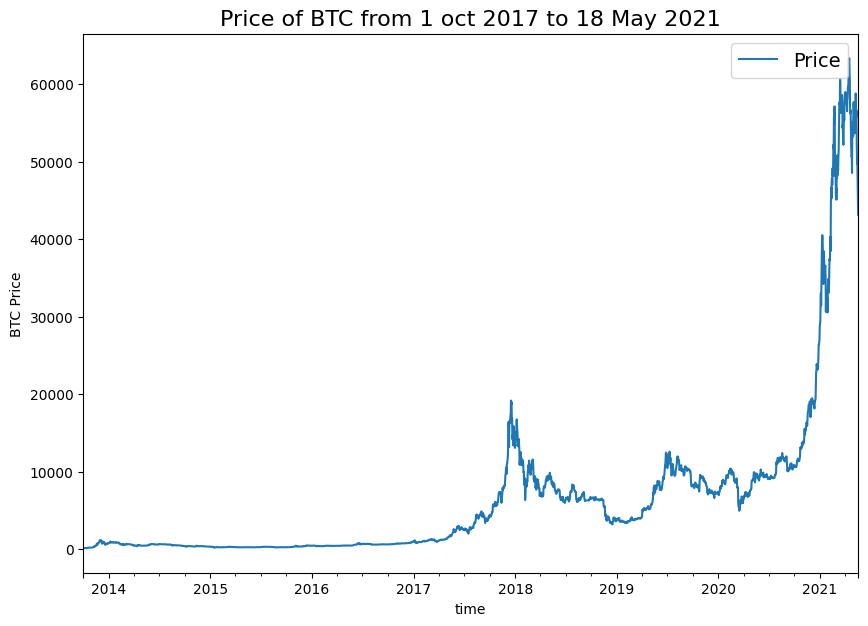

In [9]:
import matplotlib.pyplot as plt 
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.xlabel("time")
plt.title("Price of BTC from 1 oct 2017 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [10]:
timesteps = bitcoin_prices[:5]
timesteps

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]


(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

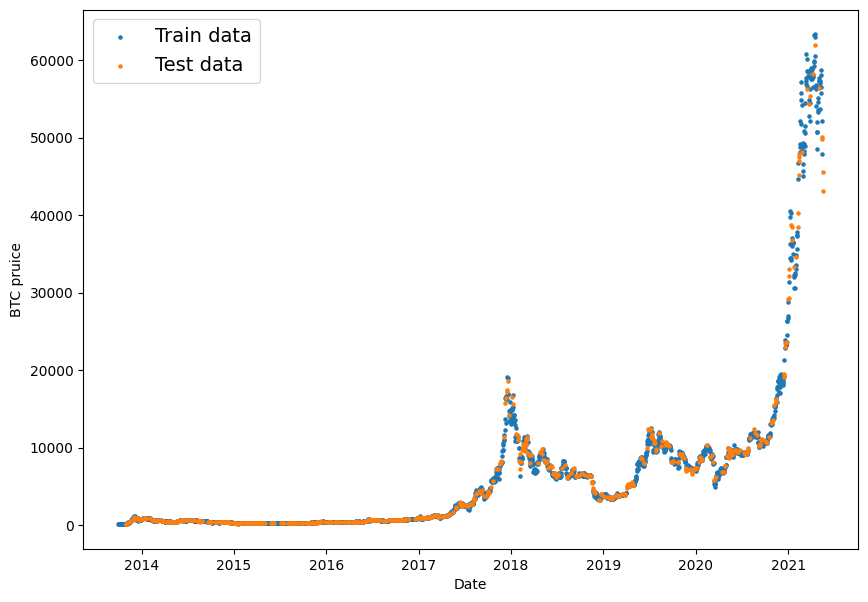

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC pruice")
plt.legend(fontsize=14)
plt.show()

In [14]:
split_size = int(0.8* len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

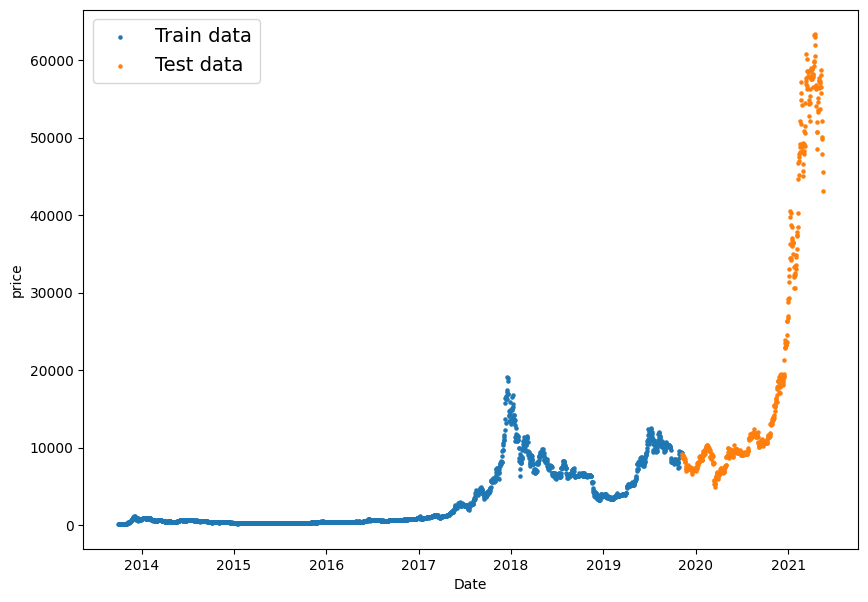

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend(fontsize=14)
plt.show()

In [16]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("time")
  plt.ylabel("btc price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

##Model_0

In [17]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

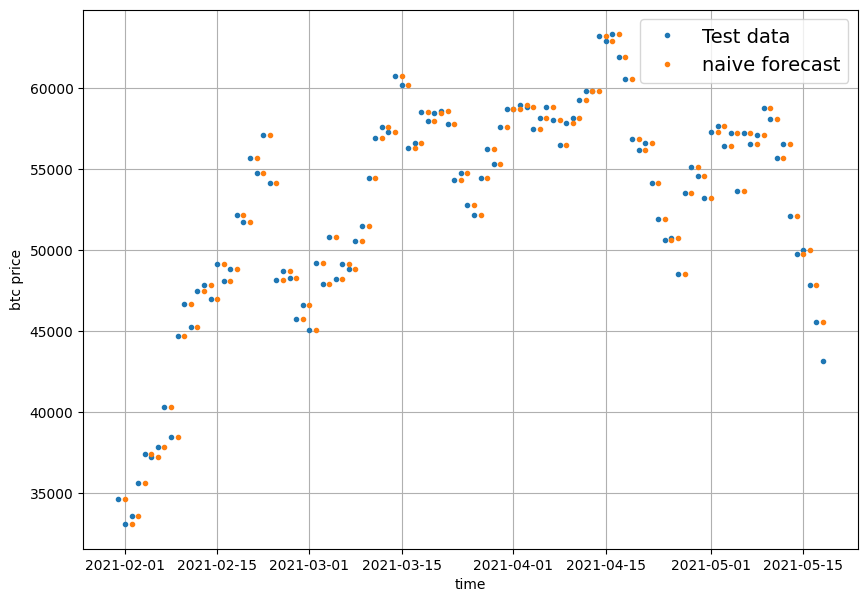

In [18]:
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test, values=y_test, start=450, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=450, format=".", label="naive forecast")

In [19]:
import tensorflow as tf

In [20]:
def mean_absolute_scaled_error(y_true, y_pred):

  mae =  tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
from keras.metrics.regression_metrics import mean_absolute_error
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae= tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

##Windowing

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
def get_labelled_window(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

window: [1 2 3 4 5 6 7] -> Label: 8


In [27]:
import numpy as np

In [28]:
def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]

  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [30]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
##Checkpoint
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

##Model_1

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1293.3993 - mae: 1293.3993  

18/18 [==============================] - 6s 136ms/step - loss: 931.0581 - mae: 931.0581 - val_loss: 2440.3564 - val_mae: 2440.3564
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 265.6903 - mae: 265.6903

18/18 [==============================] - 2s 102ms/step - loss: 254.5014 - mae: 254.5014 - val_loss: 918.9461 - val_mae: 918.9461
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 176.3971 - mae: 176.3971

18/18 [==============================] - 1s 69ms/step - loss: 176.3971 - mae: 176.3971 - val_loss: 905.4512 - val_mae: 905.4512
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 177.0589 - mae: 177.0589

18/18 [==============================] - 1s 65ms/step - loss: 163.2795 - mae: 163.2795 - val_loss: 873.6319 - val_mae: 873.6318
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 160.5886 - mae: 160.5886

18/18 [==============================] - 1s 55ms/step - loss: 155.2633 - mae: 155.2633 - val_loss: 856.3942 - val_mae: 856.3942
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 152.2253 - mae: 152.2253

18/18 [==============================] - 1s 55ms/step - loss: 154.5409 - mae: 154.5409 - val_loss: 837.7426 - val_mae: 837.7426
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 155.5419 - mae: 155.5419

18/18 [==============================] - 1s 68ms/step - loss: 149.0363 - mae: 149.0363 - val_loss: 815.2774 - val_mae: 815.2774
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 146.1838 - mae: 146.1838

18/18 [==============================] - 1s 53ms/step - loss: 146.1838 - mae: 146.1838 - val_loss: 802.7361 - val_mae: 802.7361
Epoch 9/100
18/18 [==============================] - 0s 15ms/step - loss: 146.6722 - mae: 146.6722 - val_loss: 826.3638 - val_mae: 826.3638
Epoch 10/100
 8/18 [============>.................] - ETA: 0s - loss: 138.7065 - mae: 138.7065

18/18 [==============================] - 1s 56ms/step - loss: 142.1989 - mae: 142.1989 - val_loss: 771.0635 - val_mae: 771.0635
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 139.7848 - mae: 139.7848

18/18 [==============================] - 1s 65ms/step - loss: 139.0641 - mae: 139.0641 - val_loss: 758.8252 - val_mae: 758.8252
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 136.7662 - mae: 136.7662 - val_loss: 795.8311 - val_mae: 795.8311
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 137.5613 - mae: 137.5613 - val_loss: 801.6835 - val_mae: 801.6835
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 134.0226 - mae: 134.0226 - val_loss: 763.5275 - val_mae: 763.5275
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5285 - mae: 132.5285

18/18 [==============================] - 1s 31ms/step - loss: 132.9246 - mae: 132.9246 - val_loss: 744.8378 - val_mae: 744.8378
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 130.0325 - mae: 130.0325 - val_loss: 751.5852 - val_mae: 751.5852
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 129.1644 - mae: 129.1644 - val_loss: 745.1075 - val_mae: 745.1075
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 129.7366 - mae: 129.7366 - val_loss: 752.5355 - val_mae: 752.5355
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 128.0541 - mae: 128.0541 - val_loss: 764.8285 - val_mae: 764.8285
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 127.1290 - mae: 127.1290

18/18 [==============================] - 1s 43ms/step - loss: 125.1020 - mae: 125.1020 - val_loss: 673.5723 - val_mae: 673.5723
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 126.4487 - mae: 126.4487

18/18 [==============================] - 1s 45ms/step - loss: 127.2965 - mae: 127.2965 - val_loss: 673.3386 - val_mae: 673.3386
Epoch 22/100
10/18 [===============>..............] - ETA: 0s - loss: 137.7219 - mae: 137.7219

18/18 [==============================] - 1s 36ms/step - loss: 122.8623 - mae: 122.8623 - val_loss: 664.2345 - val_mae: 664.2345
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 122.6355 - mae: 122.6355 - val_loss: 687.0023 - val_mae: 687.0023
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 120.6005 - mae: 120.6005 - val_loss: 668.4672 - val_mae: 668.4672
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 137.1499 - mae: 137.1499

18/18 [==============================] - 1s 30ms/step - loss: 119.4849 - mae: 119.4849 - val_loss: 648.5273 - val_mae: 648.5273
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 123.8414 - mae: 123.8414

18/18 [==============================] - 1s 29ms/step - loss: 119.2954 - mae: 119.2954 - val_loss: 632.8041 - val_mae: 632.8041
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8540 - mae: 119.8540 - val_loss: 651.5795 - val_mae: 651.5795
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 118.2682 - mae: 118.2682

18/18 [==============================] - 1s 43ms/step - loss: 117.6400 - mae: 117.6400 - val_loss: 630.8370 - val_mae: 630.8370
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4194 - mae: 115.4194 - val_loss: 647.5005 - val_mae: 647.5005
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 121.0016 - mae: 121.0016 - val_loss: 682.9059 - val_mae: 682.9059
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 131.9280 - mae: 131.9280 - val_loss: 990.2237 - val_mae: 990.2237
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 140.2579 - mae: 140.2579 - val_loss: 631.2844 - val_mae: 631.2844
Epoch 33/100
14/18 [======================>.......] - ETA: 0s - loss: 122.9191 - mae: 122.9191

18/18 [==============================] - 1s 45ms/step - loss: 121.4134 - mae: 121.4134 - val_loss: 629.4163 - val_mae: 629.4163
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 120.0281 - mae: 120.0281

18/18 [==============================] - 1s 35ms/step - loss: 117.6869 - mae: 117.6869 - val_loss: 613.8892 - val_mae: 613.8892
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8576 - mae: 114.8576 - val_loss: 618.6743 - val_mae: 618.6743
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8808 - mae: 125.8808 - val_loss: 708.1829 - val_mae: 708.1829
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3592 - mae: 117.3592 - val_loss: 614.3963 - val_mae: 614.3963
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 101.8925 - mae: 101.8925

18/18 [==============================] - 1s 29ms/step - loss: 114.5054 - mae: 114.5054 - val_loss: 606.5757 - val_mae: 606.5757
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2552 - mae: 116.2552 - val_loss: 726.7638 - val_mae: 726.7638
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 121.0663 - mae: 121.0663

18/18 [==============================] - 1s 30ms/step - loss: 114.5379 - mae: 114.5379 - val_loss: 598.3248 - val_mae: 598.3248
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6448 - mae: 111.6448 - val_loss: 606.8289 - val_mae: 606.8289
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1130 - mae: 116.1130 - val_loss: 605.7949 - val_mae: 605.7949
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4696 - mae: 111.4696 - val_loss: 612.8064 - val_mae: 612.8064
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9505 - mae: 114.9505 - val_loss: 638.9412 - val_mae: 638.9412
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4521 - mae: 113.4521 - val_loss: 607.6696 - val_mae: 607.6696
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8387 - mae: 111.8387 - val_loss: 602.0149 - val_mae: 602.0149
Epoch 47/100
 1/18 [>...........

18/18 [==============================] - 1s 30ms/step - loss: 111.4964 - mae: 111.4964 - val_loss: 589.9656 - val_mae: 589.9656
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8784 - mae: 110.8784 - val_loss: 628.2977 - val_mae: 628.2977
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 167.8855 - mae: 167.8855

18/18 [==============================] - 1s 30ms/step - loss: 117.5888 - mae: 117.5888 - val_loss: 585.3771 - val_mae: 585.3771
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6619 - mae: 109.6619 - val_loss: 603.8199 - val_mae: 603.8199
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9480 - mae: 110.9480 - val_loss: 613.3741 - val_mae: 613.3741
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 116.5885 - mae: 116.5885 - val_loss: 596.9879 - val_mae: 596.9879
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0069 - mae: 117.0069 - val_loss: 590.4222 - val_mae: 590.4222
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7957 - mae: 111.7957 - val_loss: 599.6216 - val_mae: 599.6216
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2558 - mae: 130.2558

18/18 [==============================] - 1s 31ms/step - loss: 111.7123 - mae: 111.7123 - val_loss: 580.4602 - val_mae: 580.4602
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0740 - mae: 109.0740 - val_loss: 748.6477 - val_mae: 748.6477
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 121.9038 - mae: 121.9038 - val_loss: 709.5120 - val_mae: 709.5120
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7949 - mae: 117.7949 - val_loss: 626.7574 - val_mae: 626.7574
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5890 - mae: 112.5890 - val_loss: 584.4747 - val_mae: 584.4747
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7340 - mae: 110.7340 - val_loss: 597.5460 - val_mae: 597.5460
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9237 - mae: 109.9237 - val_loss: 582.5082 - val_mae: 582.5082
Epoch 62/100
 1/18 [>...........

18/18 [==============================] - 1s 44ms/step - loss: 108.9896 - mae: 108.9896 - val_loss: 577.7933 - val_mae: 577.7933
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7935 - mae: 111.7935 - val_loss: 591.5662 - val_mae: 591.5662
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5907 - mae: 110.5907 - val_loss: 617.5390 - val_mae: 617.5390
Epoch 65/100
18/18 [==============================] - 0s 9ms/step - loss: 114.3451 - mae: 114.3451 - val_loss: 577.8598 - val_mae: 577.8598
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0002 - mae: 113.0002 - val_loss: 589.7073 - val_mae: 589.7073
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4952 - mae: 108.4952 - val_loss: 582.8472 - val_mae: 582.8472
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 114.6198 - mae: 114.6198 - val_loss: 688.7050 - val_mae: 688.7050
Epoch 69/100
18/18 [============

18/18 [==============================] - 1s 43ms/step - loss: 120.1967 - mae: 120.1967 - val_loss: 573.2311 - val_mae: 573.2311
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 113.0201 - mae: 113.0201 - val_loss: 626.3383 - val_mae: 626.3383
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 108.7054 - mae: 108.7054

18/18 [==============================] - 1s 39ms/step - loss: 108.8978 - mae: 108.8978 - val_loss: 571.7620 - val_mae: 571.7620
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4755 - mae: 111.4755 - val_loss: 652.6601 - val_mae: 652.6601
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 171.8825 - mae: 171.8825

18/18 [==============================] - 1s 31ms/step - loss: 108.2944 - mae: 108.2944 - val_loss: 570.4246 - val_mae: 570.4246
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9299 - mae: 107.9299 - val_loss: 624.6304 - val_mae: 624.6304
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4936 - mae: 111.4936 - val_loss: 578.3627 - val_mae: 578.3627
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 84.7564 - mae: 84.7564

18/18 [==============================] - 1s 31ms/step - loss: 108.6609 - mae: 108.6609 - val_loss: 570.3542 - val_mae: 570.3542
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 106.9302 - mae: 106.9302

18/18 [==============================] - 1s 30ms/step - loss: 109.2781 - mae: 109.2781 - val_loss: 569.0000 - val_mae: 569.0000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9363 - mae: 108.9363 - val_loss: 602.5059 - val_mae: 602.5059
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1261 - mae: 108.1261 - val_loss: 572.0028 - val_mae: 572.0028
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 106.9981 - mae: 106.9981

18/18 [==============================] - 1s 32ms/step - loss: 107.3655 - mae: 107.3655 - val_loss: 567.9424 - val_mae: 567.9424
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 112.5735 - mae: 112.5735

18/18 [==============================] - 1s 31ms/step - loss: 113.8168 - mae: 113.8168 - val_loss: 566.9915 - val_mae: 566.9915
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7643 - mae: 111.7643 - val_loss: 643.7219 - val_mae: 643.7219
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 113.6989 - mae: 113.6989

18/18 [==============================] - 1s 30ms/step - loss: 113.4342 - mae: 113.4342 - val_loss: 566.7147 - val_mae: 566.7147
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9549 - mae: 106.9549 - val_loss: 595.9620 - val_mae: 595.9620
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4579 - mae: 110.4579 - val_loss: 610.7943 - val_mae: 610.7943
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9956 - mae: 106.9956 - val_loss: 576.5328 - val_mae: 576.5328
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4198 - mae: 107.4198 - val_loss: 569.0779 - val_mae: 569.0779
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5331 - mae: 107.5331 - val_loss: 567.0837 - val_mae: 567.0837
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7941 - mae: 106.7941 - val_loss: 611.8729 - val_mae: 611.8729
Epoch 91/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 106.9677 - mae: 106.9677 - val_loss: 566.3354 - val_mae: 566.3354
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5528 - mae: 109.5528 - val_loss: 627.5626 - val_mae: 627.5626
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0592 - mae: 111.0592 - val_loss: 570.3634 - val_mae: 570.3634
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 118.0559 - mae: 118.0559

18/18 [==============================] - 1s 30ms/step - loss: 107.5568 - mae: 107.5568 - val_loss: 565.8573 - val_mae: 565.8573
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 149.3291 - mae: 149.3291

18/18 [==============================] - 1s 29ms/step - loss: 108.2606 - mae: 108.2606 - val_loss: 563.0853 - val_mae: 563.0853
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 123.5338 - mae: 123.5338 - val_loss: 564.4766 - val_mae: 564.4766


In [36]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.4767 - mae: 564.4767


[564.4766845703125, 564.4766845703125]

In [37]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 563.0854 - mae: 563.0854


[563.08544921875, 563.08544921875]

In [38]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [39]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.777, 8802.731, 9025.889, 8777.077, 8807.342, 8752.544,
        8665.912, 8555.908, 8479.747, 8531.234], dtype=float32)>)

In [40]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred= model_1_preds)
model_1_results

{'mae': 563.0854,
 'mse': 1148584.2,
 'rmse': 1071.7202,
 'mape': 2.5234356,
 'mase': 0.9891851}

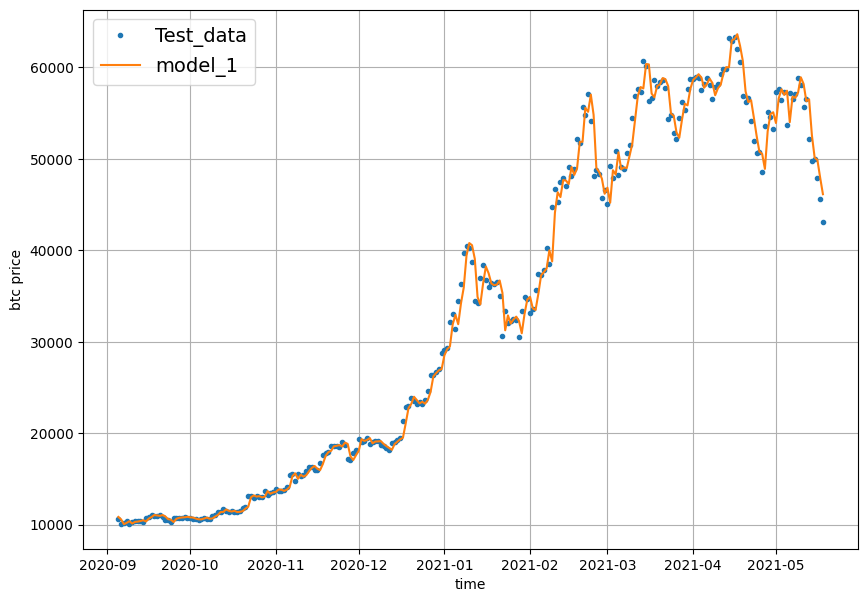

In [41]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1")

##Model_2

In [42]:
HORIZON=1 
WINDOW_SIZE = 30

In [43]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [44]:
for i in range(2):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883]


In [45]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())

model_2.fit(train_windows, 
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 637.4832


637.483154296875

In [48]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.2523


609.2522583007812

In [49]:
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 609.25214,
 'mse': 1274071.8,
 'rmse': 1128.7478,
 'mape': 2.756752,
 'mase': 1.0649787}

In [51]:
model_1_results

{'mae': 563.0854,
 'mse': 1148584.2,
 'rmse': 1071.7202,
 'mape': 2.5234356,
 'mase': 0.9891851}

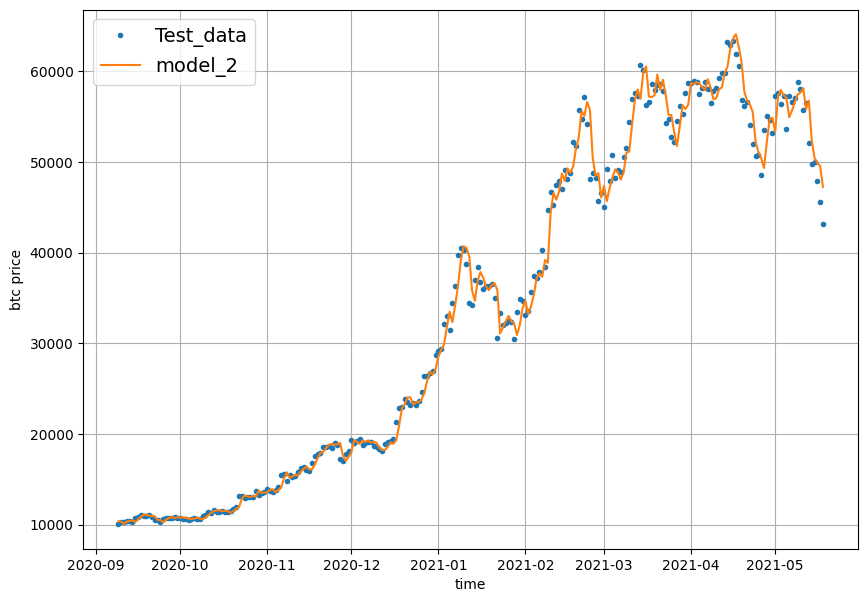

In [52]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2")

##Model_3

In [53]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [54]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, 
                                                                                labels=full_labels,
                                                                                )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [55]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_3.name)])

In [56]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1406.2644


1406.264404296875

In [57]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1234.1154


1234.1153564453125

In [58]:
model_3_preds = make_preds(model_3, test_windows)

model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9293.858 , 9332.279 , 9388.146 , 9488.236 , 9599.955 , 9458.014 ,
        9558.383 ],
       [8699.01  , 8939.677 , 8853.758 , 9249.214 , 9245.676 , 9401.269 ,
        9225.326 ],
       [8651.373 , 8738.473 , 8959.094 , 9104.297 , 8954.0625, 9135.166 ,
        9043.512 ],
       [8751.876 , 8956.978 , 9282.152 , 9232.379 , 9091.197 , 9197.456 ,
        8943.555 ],
       [8732.155 , 8976.059 , 9143.564 , 9049.611 , 8902.17  , 9097.866 ,
        8846.449 ]], dtype=float32)>

In [59]:
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [60]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1234.1154,
 'mse': 5357708.0,
 'rmse': 1419.676,
 'mape': 5.5299335,
 'mase': 2.1960392}

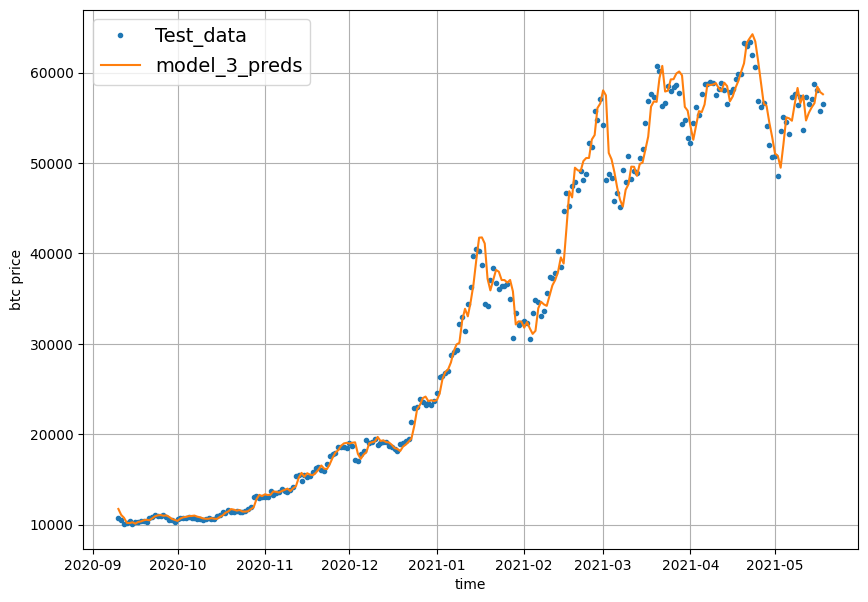

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

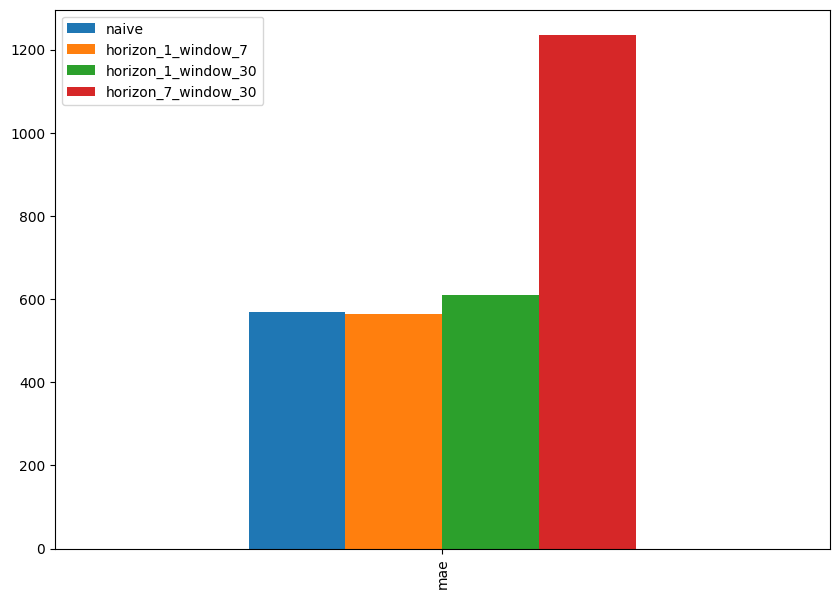

In [62]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7), kind="bar");

##Model_4

In [63]:
WINDOW_SIZE = 7
HORIZON = 1

In [64]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

Conv1D layer input: (batch_size, timesteps, input_dim)

In [66]:
train_windows[0].shape, train_labels[0].shape

((7,), (1,))

In [67]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}") 
print(f"Expanded shape: {expand_dims_layer(x).shape}") 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [68]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [69]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 564.9590


564.958984375

In [71]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8854.548 , 8768.628 , 9012.401 , 8781.544 , 8734.472 , 8721.109 ,
       8679.529 , 8521.8955, 8446.998 , 8518.983 ], dtype=float32)>

In [72]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 564.959,
 'mse': 1160976.9,
 'rmse': 1077.4863,
 'mape': 2.5371914,
 'mase': 0.99247646}

##model_5
RNN(LSTM)

In [73]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


In [74]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.9563


566.956298828125

In [75]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8869.109, 8766.611, 8968.647, 8786.656, 8729.875], dtype=float32)>

In [76]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 566.9563,
 'mse': 1172890.8,
 'rmse': 1083.0009,
 'mape': 2.535541,
 'mase': 0.9959852}

##Using block reward to find patterns

In [77]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [78]:
block_rewards_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [79]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [80]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

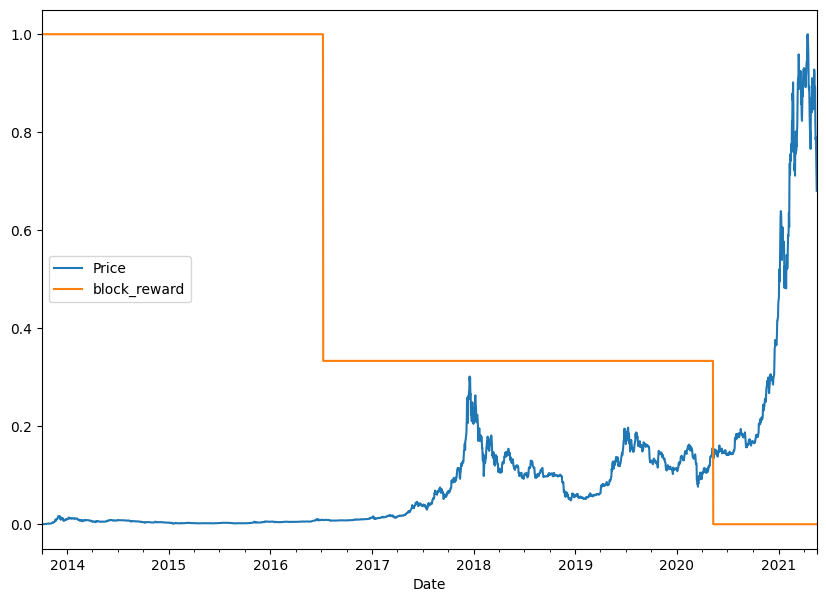

In [81]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

In [82]:
HORIZON = 1
WINDOW_SIZE = 7

In [83]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [84]:
X= bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [85]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [86]:
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [87]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

In [ ]:
model_6_pred = make_preds(model_6, X_test)
model_6_pred[:10]

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_pred)
model_6_results

##Model_7 N-BEATS

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [93]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [94]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [95]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_feature_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_feature_dataset, test_labels_dataset))

BATCH_SIZE= 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [96]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [97]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [98]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [99]:
subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [100]:
%%time 
tf.random.set_seed(42)

n_beats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = n_beats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 242: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 342: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 53s, sys: 2.52 s, total: 1min 56s
Wall time: 2min 4s


In [ ]:
model_7.evaluate(test_dataset)

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                   y_pred=model_7_preds)
model_7_results

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

##Model_8

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae","mse","mape"]):
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)
                           ])
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test_data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

##Model_9

In [ ]:
bitcoin_prices_windowed.head()

In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

model_9.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100, 
            verbose=0)

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=14,
                                       window_size=WINDOW_SIZE)

In [ ]:
future_forecast[:10]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=14)

next_time_steps

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

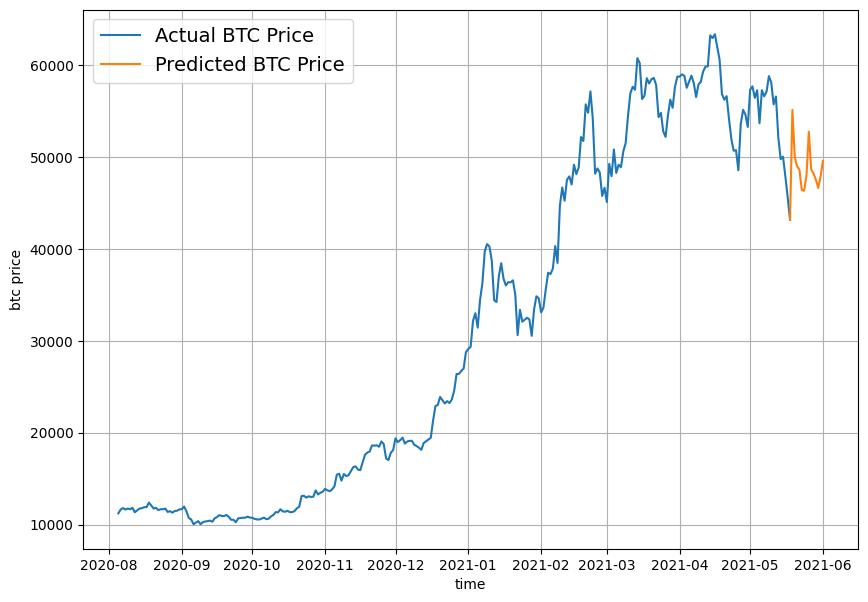

In [123]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")